<a href="https://colab.research.google.com/github/shadhin39/10MinuteSchoolDemo/blob/master/GlaucomaCNN_MaxPooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/dataset")))

['train', 'test', 'ConfusionMatrixDemo.png', 'ConfusionMatrixMaxPoolingMain.png', 'LossAveragePooling.png', 'AccuracyAveragePooling.png', 'GmodelCNNAveragePooling.h5', 'MSEAveragePooling.png', 'AUCAveragePooling.png', 'ConfusionMatrixAveragePooling.png', 'diagMax.svg', 'modelSimple.svg', 'CNNAveragePooling.png', 'MSEMaxPooling.png', 'AUCMaxPooling.png', 'ConfusionMatrixMaxPooling.png', 'CNNMaxPooling.png', 'LossMaxPooling.png', 'AccuracyMaxPooling.png', 'GmodelCNNMaxPooling.h5']


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
# print(train_datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/train',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
# print(test_datagen)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/dataset/test',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

Found 455 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [ ]:
history = classifier.fit(training_set, validation_data = test_set,batch_size=32,epochs=30, verbose=2)

Epoch 1/30
15/15 - 41s - loss: 0.1523 - accuracy: 0.9429 - val_loss: 0.1847 - val_accuracy: 0.9531
Epoch 2/30
15/15 - 40s - loss: 0.2353 - accuracy: 0.9209 - val_loss: 0.1511 - val_accuracy: 0.9688
Epoch 3/30
15/15 - 40s - loss: 0.1911 - accuracy: 0.9275 - val_loss: 0.1559 - val_accuracy: 0.9375
Epoch 4/30
15/15 - 40s - loss: 0.1867 - accuracy: 0.9341 - val_loss: 0.1296 - val_accuracy: 0.9375
Epoch 5/30
15/15 - 40s - loss: 0.1909 - accuracy: 0.9209 - val_loss: 0.1864 - val_accuracy: 0.9531
Epoch 6/30
15/15 - 40s - loss: 0.1480 - accuracy: 0.9495 - val_loss: 0.1915 - val_accuracy: 0.9219
Epoch 7/30
15/15 - 40s - loss: 0.1757 - accuracy: 0.9055 - val_loss: 0.1307 - val_accuracy: 0.9531
Epoch 8/30
15/15 - 40s - loss: 0.1998 - accuracy: 0.9055 - val_loss: 0.1793 - val_accuracy: 0.9062
Epoch 9/30
15/15 - 40s - loss: 0.1852 - accuracy: 0.9341 - val_loss: 0.1466 - val_accuracy: 0.9219
Epoch 10/30
15/15 - 40s - loss: 0.1514 - accuracy: 0.9516 - val_loss: 0.1600 - val_accuracy: 0.9062
Epoch 11/

In [ ]:
# evaluate the model
_, train_acc = classifier.evaluate(training_set, verbose=0)
_, test_acc = classifier.evaluate(test_set, verbose=0)
print(" Train_accuracy: ", train_acc)
print(" Test_accuracy: ", test_acc)

 Train_accuracy:  0.9516483545303345
 Test_accuracy:  0.953125


In [ ]:
### Performance evaluation
#########################
score = classifier.evaluate(test_set)
print(" Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])

2/2 [==============================] - 2s 573ms/step - loss: 0.1040 - accuracy: 0.9531
 Total:  64
Loss:  0.10403507202863693 Accuracy:  0.953125


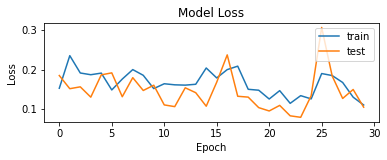

In [ ]:
# plot loss during training
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/dataset/LossMaxPooling.png')
pyplot.legend()
pyplot.show()

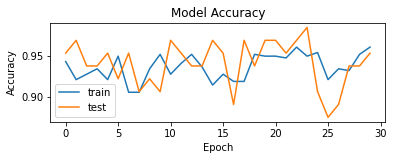

In [ ]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Model Accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/dataset/AccuracyMaxPooling.png')
pyplot.legend()
pyplot.show()

In [ ]:
classifier.save('/content/drive/My Drive/dataset/GmodelCNNMaxPooling.h5')

In [ ]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2
target_size = (256,256)
model=load_model('/content/drive/My Drive/dataset/GmodelCNNMaxPooling.h5')
print("model loaded")

model loaded


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/dataset/test/class1/Im263.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")

Glaucoma


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/dataset/test/class0/Im181.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")

Not Glaucoma


In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
classifier.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        'MeanSquaredError',
        'AUC',
    ]
)

history = classifier.fit(training_set, validation_data = test_set, epochs=30, batch_size=32, verbose=2)

Epoch 1/30
15/15 - 42s - loss: 0.0615 - mean_squared_error: 0.0615 - auc: 0.9769 - val_loss: 0.0315 - val_mean_squared_error: 0.0315 - val_auc: 0.9971
Epoch 2/30
15/15 - 41s - loss: 0.0453 - mean_squared_error: 0.0453 - auc: 0.9813 - val_loss: 0.0206 - val_mean_squared_error: 0.0206 - val_auc: 1.0000
Epoch 3/30
15/15 - 41s - loss: 0.0334 - mean_squared_error: 0.0334 - auc: 0.9912 - val_loss: 0.0211 - val_mean_squared_error: 0.0211 - val_auc: 0.9971
Epoch 4/30
15/15 - 41s - loss: 0.0341 - mean_squared_error: 0.0341 - auc: 0.9917 - val_loss: 0.0141 - val_mean_squared_error: 0.0141 - val_auc: 1.0000
Epoch 5/30
15/15 - 41s - loss: 0.0348 - mean_squared_error: 0.0348 - auc: 0.9908 - val_loss: 0.0184 - val_mean_squared_error: 0.0184 - val_auc: 0.9990
Epoch 6/30
15/15 - 41s - loss: 0.0411 - mean_squared_error: 0.0411 - auc: 0.9891 - val_loss: 0.0374 - val_mean_squared_error: 0.0374 - val_auc: 0.9951
Epoch 7/30
15/15 - 41s - loss: 0.0567 - mean_squared_error: 0.0567 - auc: 0.9732 - val_loss: 0

No handles with labels found to put in legend.


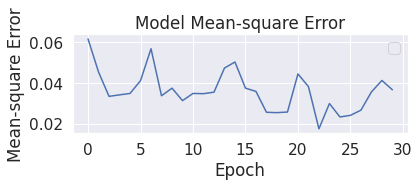

In [ ]:
#mean-square error
pyplot.subplot(212)
pyplot.title('Model Mean-square Error')
pyplot.ylabel('Mean-square Error')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['mean_squared_error'])
pyplot.savefig('/content/drive/My Drive/dataset/MSEMaxPooling.png')
pyplot.legend()
pyplot.show()


No handles with labels found to put in legend.


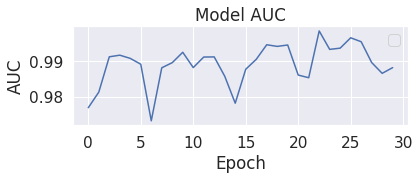

In [ ]:
#auc value
pyplot.subplot(212)
pyplot.title('Model AUC')
pyplot.ylabel('AUC')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['auc'])
pyplot.savefig('/content/drive/My Drive/dataset/AUCMaxPooling.png')
pyplot.legend()
pyplot.show()

In [ ]:
#confusion matrix values
classifier.compile(optimizer='sgd',
              loss='mse',
              metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
history = classifier.fit(training_set, validation_data = test_set, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
15/15 - 42s - loss: 0.0441 - true_positives: 188.0000 - true_negatives: 242.0000 - false_positives: 13.0000 - false_negatives: 12.0000 - val_loss: 0.0218 - val_true_positives: 31.0000 - val_true_negatives: 31.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000
Epoch 2/10
15/15 - 40s - loss: 0.0498 - true_positives: 185.0000 - true_negatives: 237.0000 - false_positives: 18.0000 - false_negatives: 15.0000 - val_loss: 0.0172 - val_true_positives: 31.0000 - val_true_negatives: 32.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 1.0000
Epoch 3/10
15/15 - 40s - loss: 0.0363 - true_positives: 190.0000 - true_negatives: 244.0000 - false_positives: 11.0000 - false_negatives: 10.0000 - val_loss: 0.0216 - val_true_positives: 31.0000 - val_true_negatives: 31.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000
Epoch 4/10
15/15 - 41s - loss: 0.0347 - true_positives: 189.0000 - true_negatives: 247.0000 - false_positives: 8.0000 - false_negatives: 11.0

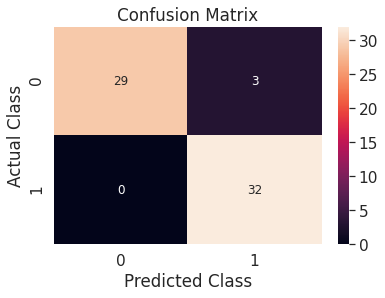

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[29,3],
         [0,32]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/dataset/ConfusionMatrixMaxPooling.png')
pyplot.show()

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               15745152  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

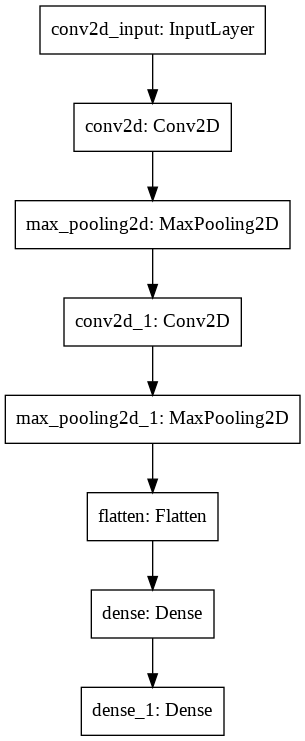

In [ ]:
from keras.utils.vis_utils import plot_model as plot
plot(classifier, to_file='/content/drive/My Drive/dataset/CNNMaxPooling.png')